## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dependencies
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv2, StocksEnv2, Actions2, Positions2
from gym_anytrading.envs import TradingEnv, ForexEnv, Actions, Positions

In [3]:
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import A2C, PPO, DQN

In [4]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import tensorflow
print(tensorflow.__version__)

2.8.1


In [6]:
import quantstats as qs

## Import the data & pre-processing

In [7]:
#loading our dataset
df = pd.read_csv('../../data/binance_BTCUSDT_1h_from_2020_01_01_to_2022_09_30_candlesticks_signals_processed_technical_indicators_and_crypto_index.csv')
#viewing first 5 columns
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
0,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,19912.415403,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
1,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,21356.874781,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,26300.506879,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
3,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,27066.047406,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
4,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,26597.051452,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387


In [8]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore',
       'formatted_open_time', 'formatted_close_time', 'upper_shadow',
       'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER', 'CDLHAMMER',
       'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN',
       'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR', 'CDLENGULFING',
       'CDLENGULFINGBULLISH', 'CDLENGULFINGBEARISH', 'CDLINVERTEDHAMMER_NEW',
       'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW',
       'CDLENGULFINGBULLISH_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW',
       'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW',
       'CDLENGULFINGBEARISH_NEW', 'MA5', 'MA10', 'MA20', 'MA60', 'MA120',
       'volume_MA5', 'volume_MA10', 'volume_MA20', 'SMA5', 'SMA10', 'SMA20',
       'SMA60', 'SMA120', 'volume_SMA5', 'volume_SMA10', 'volume_SMA20',
       'WMA5', 'W

In [9]:
#converting Date Column to DateTime Type
df['Date'] = pd.to_datetime(df['formatted_open_time'])
df.dtypes

open_time                        int64
open                           float64
high                           float64
low                            float64
close                          float64
                             ...      
ratio_low_open                 float64
ratio_close_open               float64
time_to_chart_return           float64
crypto_index                   float64
Date                    datetime64[ns]
Length: 91, dtype: object

In [10]:
#setting the column as index
df.set_index('Date', inplace=True)
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06 00:00:00,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,19912.415403,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
2020-01-06 01:00:00,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,21356.874781,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2020-01-06 02:00:00,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,26300.506879,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
2020-01-06 03:00:00,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,27066.047406,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
2020-01-06 04:00:00,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,26597.051452,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387


<AxesSubplot:xlabel='Date'>

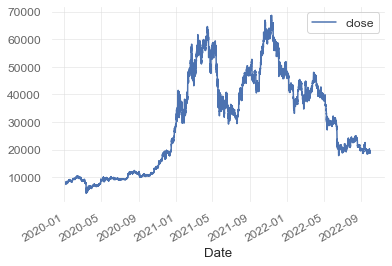

In [11]:
df.plot(y='close')

### Select the date period that we would like to work with

In [12]:
cut_start_date_id = int(df.index.get_loc('2021-01-07 00:00:00'))
cut_end_date_id = int(df.index.get_loc('2021-12-31 00:00:00'))

In [13]:
df_selected_columns = df[cut_start_date_id:cut_end_date_id+1]
#df_selected_columns = df[['close', 'volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']]

In [14]:
df_selected_columns.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-07 00:00:00,1609977600000,36769.36,37287.63,36422.71,37150.66,6259.578978,1609981199999,2.311275e+08,126956,3276.043725,...,33478.486276,2.208838e+06,836.043442,28.058604,34371.316811,1.014095,0.990572,1.010370,0.010370,5048.501444
2021-01-07 01:00:00,1609981200000,37150.66,37227.61,36615.83,36871.47,4542.039730,1609984799999,1.677442e+08,92343,2188.222216,...,33404.259757,2.208091e+06,820.024624,27.313990,34721.274394,1.002071,0.985604,0.992485,-0.007515,5010.561576
2021-01-07 02:00:00,1609984800000,36871.47,37087.01,36456.00,36962.37,4112.981009,1609988399999,1.513786e+08,75846,1862.594065,...,33341.340197,2.210580e+06,806.523580,26.267528,35029.237067,1.005846,0.988732,1.002465,0.002465,5022.914218
2021-01-07 03:00:00,1609988400000,36962.37,37699.00,36926.53,37454.48,4747.646909,1609991999999,1.773801e+08,102236,2489.391295,...,33291.220767,2.212322e+06,804.091181,25.292858,35300.244219,1.019929,0.999030,1.013314,0.013314,5089.788347
2021-01-07 04:00:00,1609992000000,37452.62,37550.00,37056.12,37450.95,4099.953841,1609995599999,1.530321e+08,93723,1967.847679,...,33301.262862,2.214777e+06,781.933240,24.602389,35636.070028,1.002600,0.989413,0.999955,-0.000094,5089.308646


In [15]:
df_selected_columns.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30 20:00:00,1640894400000,47558.35,47682.07,47071.00,47203.16,1456.46283,1640897999999,6.896119e+07,39037,694.12599,...,46317.690138,3.129011e+06,422.923489,24.150498,46618.558079,1.002601,0.989753,0.992531,-0.007469,6414.562256
2021-12-30 21:00:00,1640898000000,47203.16,47347.84,46919.44,47300.00,890.70108,1640901599999,4.202622e+07,34150,406.78740,...,46392.919868,3.129702e+06,423.314669,24.870725,46746.702271,1.003065,0.993989,1.002052,0.002052,6427.722100
2021-12-30 22:00:00,1640901600000,47299.99,47325.33,46729.00,47084.88,792.93614,1640905199999,3.729493e+07,32869,404.90476,...,46447.027770,3.129856e+06,435.672907,26.058009,47900.000000,1.000536,0.987928,0.995452,-0.004548,6398.488874
2021-12-30 23:00:00,1640905200000,47084.88,47242.60,46940.96,47120.87,710.18694,1640908799999,3.344807e+07,29876,344.42736,...,46544.901109,3.129993e+06,426.099128,26.916648,47876.580000,1.003350,0.996943,1.000764,0.000764,6403.379650
2021-12-31 00:00:00,1640908800000,47120.88,47500.00,46826.21,47073.98,1084.11426,1640912399999,5.109534e+07,39334,487.53280,...,46596.997665,3.129706e+06,443.791333,27.306459,47853.628400,1.008046,0.993747,0.999005,-0.000995,6397.007644


In [16]:
df_selected_columns.shape

(8580, 90)

<AxesSubplot:xlabel='Date'>

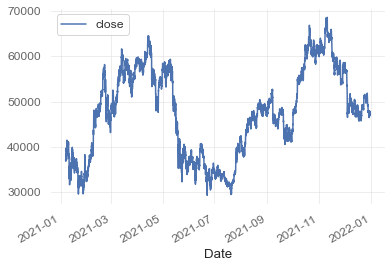

In [17]:
df_selected_columns.plot(y='close')

## (Re)define some important methods

In [18]:
def my_process_data(env):
    
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'close'].to_numpy()[start:end]
    #signal_features = env.df.loc[:, ['volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['SMA20', 'SMA60', 'CCI_14', 'ADX_14', 
                                    'ADXR_14', 'MACD_12_26_9', 'RSI_14', 'BBANDS_U', 'BBANDS_L']].to_numpy()[start:end]

    #dates = env.df.index[start:end].tolist()
    return prices, signal_features #, dates


class MyEnv(StocksEnv2):
    _process_data = my_process_data

## Set some important parameters 

In [19]:
window_size = 24 * 7
start_date_id = int(df_selected_columns.index.get_loc('2021-01-14 01:00:00'))
mid_date_id = int(df_selected_columns.index.get_loc('2021-09-01 00:00:00'))
end_date_id = int(df_selected_columns.index.get_loc('2021-12-31 00:00:00'))

In [20]:
# dt_start_to_mid = df_selected_columns.index[start_date_id:mid_date_id+1]
# dt_mid_to_end = df_selected_columns.index[mid_date_id:end_date_id+1]

In [21]:
#print(f'{start_date_id} {mid_date_id} {end_date_id}')

In [22]:
print(f'mid_date_id - start_date_id: {mid_date_id - start_date_id}')
print(f'end_date_id - mid_date_id: {end_date_id - mid_date_id}')
print(f'end_date_id - start_date_id: {end_date_id - start_date_id}')

mid_date_id - start_date_id: 5508
end_date_id - mid_date_id: 2902
end_date_id - start_date_id: 8410


## Set the enviroment and train the models

In [23]:
#setting up our environment for training 
env_A2C = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(start_date_id, mid_date_id))

#Applying the Trading RL Algorithm
model_A2C = A2C('MlpPolicy', env_A2C, verbose=0, tensorboard_log="../tensorboard_logs/myenv_tensorboard/") 
 
#setting the learning timesteps
model_A2C.learn(total_timesteps=(mid_date_id - start_date_id), tb_log_name="a2c")

In [ ]:
#setting up our environment for training 
env_PPO = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(start_date_id, mid_date_id))

#Applying the Trading RL Algorithm
model_PPO = PPO('MlpPolicy', env_PPO, verbose=0, tensorboard_log="../tensorboard_logs/myenv_tensorboard/") 
 
#setting the learning timesteps
model_PPO.learn(total_timesteps=(mid_date_id - start_date_id), tb_log_name="ppo")

In [ ]:
#setting up our environment for training 
env_DQN = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(start_date_id, mid_date_id))

#Applying the Trading RL Algorithm
model_DQN = DQN('MlpPolicy', env_DQN, verbose=0, tensorboard_log="../tensorboard_logs/myenv_tensorboard/") 
 
#setting the learning timesteps
model_DQN.learn(total_timesteps=(mid_date_id - start_date_id), tb_log_name="dqn")

## Trained models: Check the results

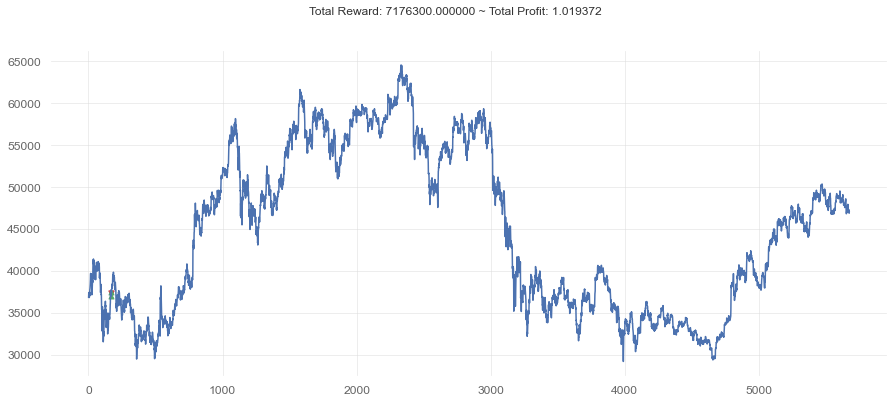

In [24]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_A2C.render_all()
plt.show()

In [ ]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_PPO.render_all()
plt.show()

In [ ]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_DQN.render_all()
plt.show()

## Validate the models

In [25]:
#Setting up the Agent Environment
env_A2C = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(mid_date_id, end_date_id))
obs = env_A2C.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_A2C.predict(obs)
    obs, rewards, done, info = env_A2C.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -125598499.99999642, 'total_profit': 0.9092575652367283, 'position': 0}


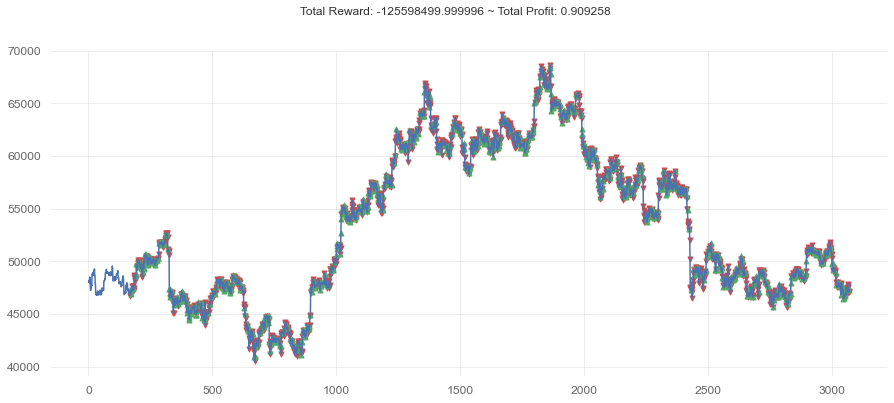

In [26]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_A2C.render_all()
plt.show()

In [ ]:
#Setting up the Agent Environment
env_PPO = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(mid_date_id, end_date_id))
obs = env_PPO.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_PPO.predict(obs)
    obs, rewards, done, info = env_PPO.step(action)
    if done:
        print("info", info)
        break

In [ ]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_PPO.render_all()
plt.show()

In [ ]:
#Setting up the Agent Environment
env_DQN = MyEnv(df=df_selected_columns, window_size=window_size, frame_bound=(mid_date_id, end_date_id))
obs = env_DQN.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_DQN.predict(obs)
    obs, rewards, done, info = env_DQN.step(action)
    if done:
        print("info", info)
        break

In [ ]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env_DQN.render_all()
plt.show()

## Validated models: Check the results

In [ ]:
qs.extend_pandas()

start_index = mid_date_id
end_index = end_date_id

net_worth = pd.Series(env_A2C.history['total_profit'], index=df_selected_columns.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

In [ ]:
qs.extend_pandas()

start_index = mid_date_id
end_index = end_date_id

net_worth = pd.Series(env_PPO.history['total_profit'], index=df_selected_columns.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='ppo_quantstats.html')

In [ ]:
qs.extend_pandas()

start_index = mid_date_id
end_index = end_date_id

net_worth = pd.Series(env_DQN.history['total_profit'], index=df_selected_columns.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='dqn_quantstats.html')